## Комментарий

In [1370]:
import pandas as pd 
import numpy as np

In [1371]:
import seaborn as sns 
import matplotlib.pyplot as plt 

In [1372]:
df = pd.read_csv('train_data.csv')

In [1373]:
target = df[['Default']]

In [1374]:
df.head()

,Deal_id,Deal_date,First_deal_date,Secret_info_1,Secret_info_2,Secret_info_3,First_default_date,Successful_deals_count,Region,Bank,Hashed_deal_detail_1,Hashed_deal_detail_2,Hashed_deal_detail_3,Hashed_deal_detail_4,Hashed_deal_detail_5,Hashed_deal_detail_6,Age,Gender,Default
0,22487461,2015-11-05,2015-08-29,NaN,NaN,NaN,NaN,0.0,3,7,2.5,-3,8,2.5,-3,5,36.0,Male,0
1,62494261,2016-08-26,2015-12-21,3.5,-2.0,5.0,2016-07-30,2.0,4,7,2.5,-3,14,3.5,-3,5,29.0,Female,1
2,34822849,2016-02-18,2015-11-11,NaN,NaN,NaN,NaN,0.0,6,7,2.5,-3,8,2.5,-3,5,56.0,Female,0
3,46893387,2016-04-30,2016-03-22,NaN,NaN,NaN,NaN,0.0,2,13,2.5,-2,5,2.5,-3,5,27.0,Female,0
4,67128275,2016-09-19,2016-07-21,NaN,NaN,NaN,NaN,0.0,4,39,2.5,-3,7,2.5,-3,5,37.0,Female,0


## Выделяем временные признаки
Работаем с временными колонками

In [1375]:
df.Deal_date = pd.to_datetime(df.Deal_date)
df.First_deal_date = pd.to_datetime(df.First_deal_date)
df.First_default_date = pd.to_datetime(df.First_default_date)

In [1376]:
df.First_default_date = df.First_default_date.fillna(df.First_default_date.min() - pd.Timedelta(days=365))

In [1377]:
df['Days_from_first_deal'] = df.Deal_date - df.First_deal_date

In [1378]:
df['Days_from_first_deal']=df.Days_from_first_deal.astype(str).apply(lambda x: int(x.split()[0]))

In [1379]:
df['Days_from_default'] = (df.Deal_date-df.First_default_date)

In [1380]:
df['Days_from_default']=df['Days_from_default'].apply(lambda x: int(str(x).split()[0]) if not pd.isna(x) else 0)

In [1381]:
df.Successful_deals_count = df.Successful_deals_count.fillna(0)

In [1382]:
df['Deal_day'] = df.Deal_date.dt.day
df['Deal_month'] = df.Deal_date.dt.month

df['First_deal_day'] = df.First_deal_date.dt.day
df['First_deal_month'] = df.First_deal_date.dt.month

df['First_default_day'] = df.First_default_date.dt.day
df['First_default_month'] = df.First_default_date.dt.month


df['end_of_month'] = df.Deal_day.isin([25,26,27,28,29,30,31]).astype(int)
df['days_from_default']=(df.Deal_date - df.First_default_date).apply(lambda x: int(str(x).split()[0]))



In [1383]:
df = df.drop(['Deal_date','First_deal_date','First_default_date'],axis=1)

Отдельный случай - когда регион неизвествен. Добавляю отдельное название

In [1384]:
df.Region = df.Region.fillna('unknown')

In [1385]:
df.Secret_info_1 = df.Secret_info_1.fillna(df.Secret_info_1.mean())
df.Secret_info_2 = df.Secret_info_1.fillna(df.Secret_info_2.mean())
df.Secret_info_3 = df.Secret_info_1.fillna(df.Secret_info_3.mean())

In [1386]:
df = df.drop('Deal_id',axis=1)

In [1387]:
df.isna().any()

Secret_info_1             False
Secret_info_2             False
Secret_info_3             False
Successful_deals_count    False
Region                    False
Bank                      False
Hashed_deal_detail_1      False
Hashed_deal_detail_2      False
Hashed_deal_detail_3      False
Hashed_deal_detail_4      False
Hashed_deal_detail_5      False
Hashed_deal_detail_6      False
Age                       False
Gender                    False
Default                   False
Days_from_first_deal      False
Days_from_default         False
Deal_day                  False
Deal_month                False
First_deal_day            False
First_deal_month          False
First_default_day         False
First_default_month       False
end_of_month              False
days_from_default         False
dtype: bool

In [1388]:
df

,Secret_info_1,Secret_info_2,Secret_info_3,Successful_deals_count,Region,Bank,Hashed_deal_detail_1,Hashed_deal_detail_2,Hashed_deal_detail_3,Hashed_deal_detail_4,...,Days_from_first_deal,Days_from_default,Deal_day,Deal_month,First_deal_day,First_deal_month,First_default_day,First_default_month,end_of_month,days_from_default
0,3.935514,3.935514,3.935514,0.0,3,7,2.5,-3,8,2.5,...,68,553,5,11,29,8,1,5,0,553
1,3.500000,3.500000,3.500000,2.0,4,7,2.5,-3,14,3.5,...,249,27,26,8,21,12,30,7,1,27
2,3.935514,3.935514,3.935514,0.0,6,7,2.5,-3,8,2.5,...,99,658,18,2,11,11,1,5,0,658
3,3.935514,3.935514,3.935514,0.0,2,13,2.5,-2,5,2.5,...,39,730,30,4,22,3,1,5,1,730
4,3.935514,3.935514,3.935514,0.0,4,39,2.5,-3,7,2.5,...,60,872,19,9,21,7,1,5,0,872
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3163,3.935514,3.935514,3.935514,0.0,3,7,2.5,-3,10,2.5,...,154,709,9,4,7,11,1,5,0,709
3164,3.935514,3.935514,3.935514,0.0,5,7,2.5,-3,10,2.5,...,158,753,23,5,17,12,1,5,0,753
3165,3.935514,3.935514,3.935514,0.0,4,7,2.5,-3,5,3.5,...,30,867,14,9,15,8,1,5,0,867
3166,3.935514,3.935514,3.935514,0.0,7,7,2.5,-3,11,2.5,...,179,862,9,9,14,3,1,5,0,862


## Заполнили пропуски, выделили признаки. На данном этапе проведем анализ данных

Посмотрим, различаются ли пользователи внутри определенных признаков. Для этого сгруппируем датафрейм по отдельным признакам и посмотрим на различие среднего количества дефолтов в группах

In [1402]:
display(df.groupby('Successful_deals_count')['Default'].mean(), df.groupby('Bank')['Default'].mean(),df.groupby('Region')['Default'].mean())


Successful_deals_count
0.0     0.133542
1.0     0.072165
2.0     0.087838
3.0     0.040984
4.0     0.123810
5.0     0.038462
6.0     0.130435
7.0     0.076923
8.0     0.000000
9.0     0.000000
10.0    0.000000
11.0    0.000000
12.0    0.000000
17.0    0.000000
Name: Default, dtype: float64

Bank
2     0.000000
7     0.134432
8     0.087912
10    0.000000
13    0.061417
15    0.000000
17    0.172414
18    0.068493
22    0.200000
23    0.192708
26    0.233766
27    0.053763
39    0.083333
43    0.166667
44    0.000000
45    0.090909
47    0.000000
49    0.000000
58    0.000000
Name: Default, dtype: float64

Region
0    0.131455
1    0.075000
2    0.075893
3    0.128738
4    0.145604
5    0.100000
6    0.087866
7    0.055556
n    0.285714
Name: Default, dtype: float64

In [1403]:
df.groupby('Hashed_deal_detail_1')['Default'].mean(), df.groupby('Hashed_deal_detail_2')['Default'].mean(), df.groupby('Hashed_deal_detail_3')['Default'].mean()

(Hashed_deal_detail_1
 2.5     0.111217
 3.5     0.000000
 4.5     0.000000
 5.5     0.000000
 7.5     0.000000
 10.5    0.000000
 17.5    1.000000
 Name: Default, dtype: float64,
 Hashed_deal_detail_2
 -3     0.109649
 -2     0.129630
 -1     0.171053
  0     0.085714
  1     0.189189
  2     0.129032
  3     0.076923
  4     0.045455
  5     0.083333
  6     0.083333
  7     0.000000
  8     0.000000
  9     0.000000
  10    0.500000
  11    0.333333
  12    0.000000
  13    0.000000
  14    0.000000
  15    0.000000
  19    0.000000
  20    0.000000
  21    0.000000
  78    0.000000
 Name: Default, dtype: float64,
 Hashed_deal_detail_3
 5     0.094053
 6     0.191589
 7     0.146341
 8     0.104348
 9     0.098712
 10    0.092683
 11    0.093220
 12    0.087719
 13    0.054348
 14    0.068182
 15    0.102941
 16    0.000000
 17    0.025000
 18    0.080000
 19    0.111111
 20    0.000000
 21    0.100000
 22    0.000000
 23    0.166667
 24    0.000000
 25    0.000000
 26    0.000000
 

In [1404]:
df.groupby('Hashed_deal_detail_4')['Default'].mean(), df.groupby('Hashed_deal_detail_5')['Default'].mean(), df.groupby('Hashed_deal_detail_6')['Default'].mean()

(Hashed_deal_detail_4
 2.5     0.118267
 3.5     0.130682
 4.5     0.120370
 5.5     0.068627
 6.5     0.035714
 7.5     0.025000
 8.5     0.022727
 9.5     0.000000
 10.5    0.000000
 11.5    0.000000
 12.5    0.083333
 13.5    0.000000
 14.5    0.000000
 15.5    0.000000
 16.5    0.000000
 17.5    0.000000
 18.5    0.000000
 19.5    0.000000
 21.5    0.000000
 32.5    0.000000
 37.5    0.000000
 Name: Default, dtype: float64,
 Hashed_deal_detail_5
 -3    0.110545
 -2    0.105263
 -1    0.000000
  0    0.000000
  1    0.666667
  2    0.000000
  4    0.000000
 Name: Default, dtype: float64,
 Hashed_deal_detail_6
 5    0.110795
 Name: Default, dtype: float64)

В ходе исследования оказалось, что колонка Hashed_deal_detail_6 является польностью константной. Удаляем ее

In [1405]:
df.Hashed_deal_detail_6.unique()

array([5])

In [1406]:
df = df.drop(['Hashed_deal_detail_6'],axis=1)

Посмотрим на матрицу корреляций

In [1407]:
df.drop(['Region','Gender'],axis=1).corr()

,Secret_info_1,Secret_info_2,Secret_info_3,Successful_deals_count,Bank,Hashed_deal_detail_1,Hashed_deal_detail_2,Hashed_deal_detail_3,Hashed_deal_detail_4,Hashed_deal_detail_5,...,Days_from_first_deal,Days_from_default,Deal_day,Deal_month,First_deal_day,First_deal_month,First_default_day,First_default_month,end_of_month,days_from_default
Secret_info_1,1.000000,1.000000,1.000000,0.039834,-0.020267,0.003417,0.002228,0.075105,-0.004157,0.004889,...,0.087842,0.052563,0.004552,0.005305,0.011658,-0.003011,0.018397,0.208635,-0.006348,0.052563
Secret_info_2,1.000000,1.000000,1.000000,0.039834,-0.020267,0.003417,0.002228,0.075105,-0.004157,0.004889,...,0.087842,0.052563,0.004552,0.005305,0.011658,-0.003011,0.018397,0.208635,-0.006348,0.052563
Secret_info_3,1.000000,1.000000,1.000000,0.039834,-0.020267,0.003417,0.002228,0.075105,-0.004157,0.004889,...,0.087842,0.052563,0.004552,0.005305,0.011658,-0.003011,0.018397,0.208635,-0.006348,0.052563
Successful_deals_count,0.039834,0.039834,0.039834,1.000000,0.012744,0.059831,0.193516,0.500938,0.195267,0.013841,...,0.609752,-0.035537,0.006517,0.004058,0.012405,-0.027761,0.122028,-0.003821,0.008641,-0.035537
Bank,-0.020267,-0.020267,-0.020267,0.012744,1.000000,0.026700,0.083178,-0.109438,0.090768,0.013752,...,-0.040925,-0.012813,0.011667,-0.023036,0.026890,0.002591,0.002636,0.012680,0.008559,-0.012813
Hashed_deal_detail_1,0.003417,0.003417,0.003417,0.059831,0.026700,1.000000,0.013171,-0.013719,-0.003347,-0.004021,...,0.018138,0.001414,-0.004269,0.019709,-0.013031,-0.050330,-0.009645,0.003309,-0.017665,0.001414
Hashed_deal_detail_2,0.002228,0.002228,0.002228,0.193516,0.083178,0.013171,1.000000,-0.147369,-0.022062,0.060517,...,0.222589,-0.047614,0.027662,0.000578,0.059625,-0.028471,0.084010,0.005154,0.021007,-0.047614
Hashed_deal_detail_3,0.075105,0.075105,0.075105,0.500938,-0.109438,-0.013719,-0.147369,1.000000,-0.247673,-0.054352,...,0.635047,-0.048236,-0.005114,-0.003114,0.006736,-0.012900,0.139637,0.046656,0.001795,-0.048236
Hashed_deal_detail_4,-0.004157,-0.004157,-0.004157,0.195267,0.090768,-0.003347,-0.022062,-0.247673,1.000000,-0.008939,...,0.169470,-0.002022,-0.006354,0.021508,-0.001258,0.016937,0.063183,-0.009467,-0.012377,-0.002022
Hashed_deal_detail_5,0.004889,0.004889,0.004889,0.013841,0.013752,-0.004021,0.060517,-0.054352,-0.008939,1.000000,...,0.053830,0.023117,0.004233,-0.025167,0.002381,0.001204,-0.020990,0.008419,-0.029852,0.023117


Как мы видим, Secret_info_1, Secret_info_2, Secret_info_3 полностью скоррелированы. Удалим два из них 

In [1408]:
df = df.drop(['Secret_info_2','Secret_info_3'],axis=1)

## Смотрим на распределение некоторых данных 

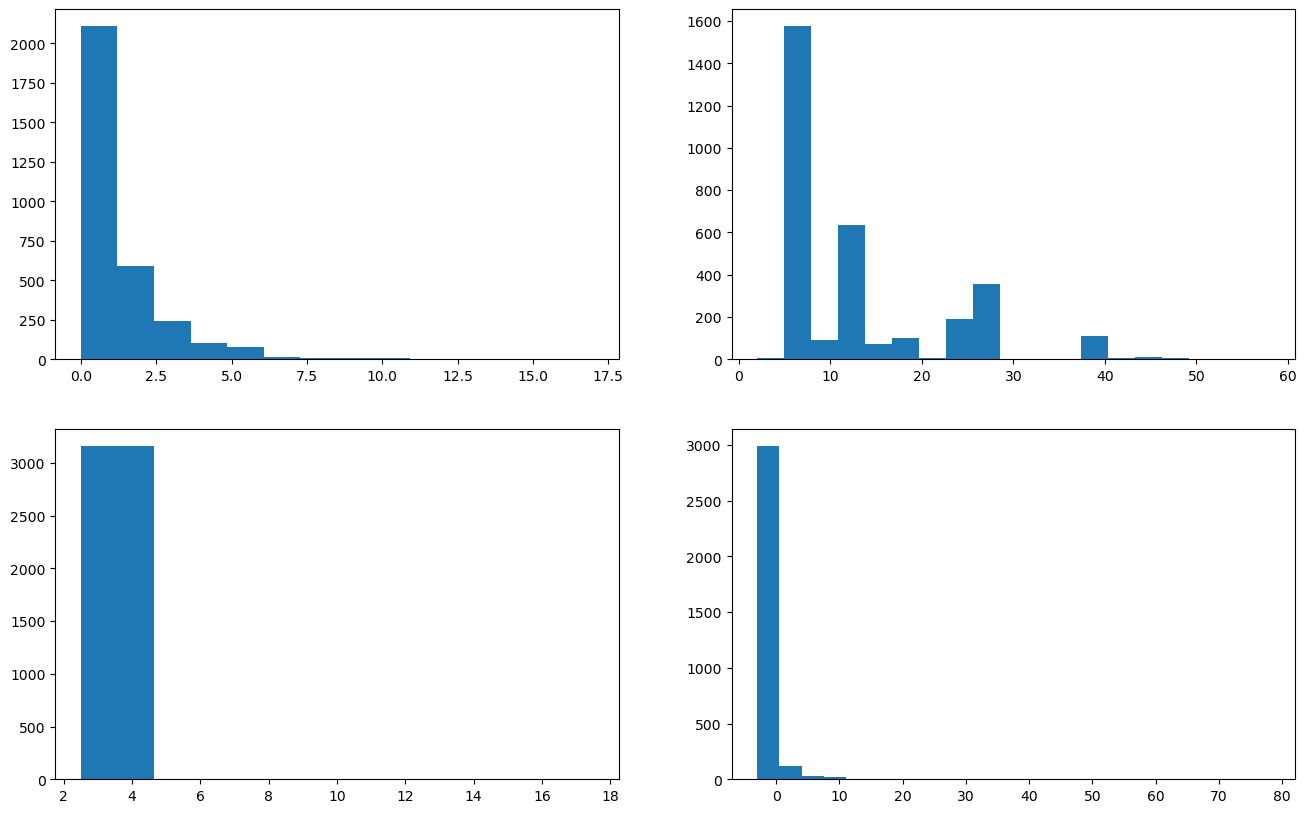

In [1409]:
fig = plt.figure()
fig.set_size_inches(16,10)

ax1 = fig.add_subplot(2,2,1)
plt.hist(df.Successful_deals_count, bins = df.Successful_deals_count.nunique())
ax1 = fig.add_subplot(2,2,2)
plt.hist(df.Bank, bins = df.Bank.nunique())
ax1 = fig.add_subplot(2,2,3)
plt.hist(df.Hashed_deal_detail_1, bins = df.Hashed_deal_detail_1.nunique())
ax1 = fig.add_subplot(2,2,4)
plt.hist(df.Hashed_deal_detail_2, bins = df.Hashed_deal_detail_2.nunique())

plt.show()

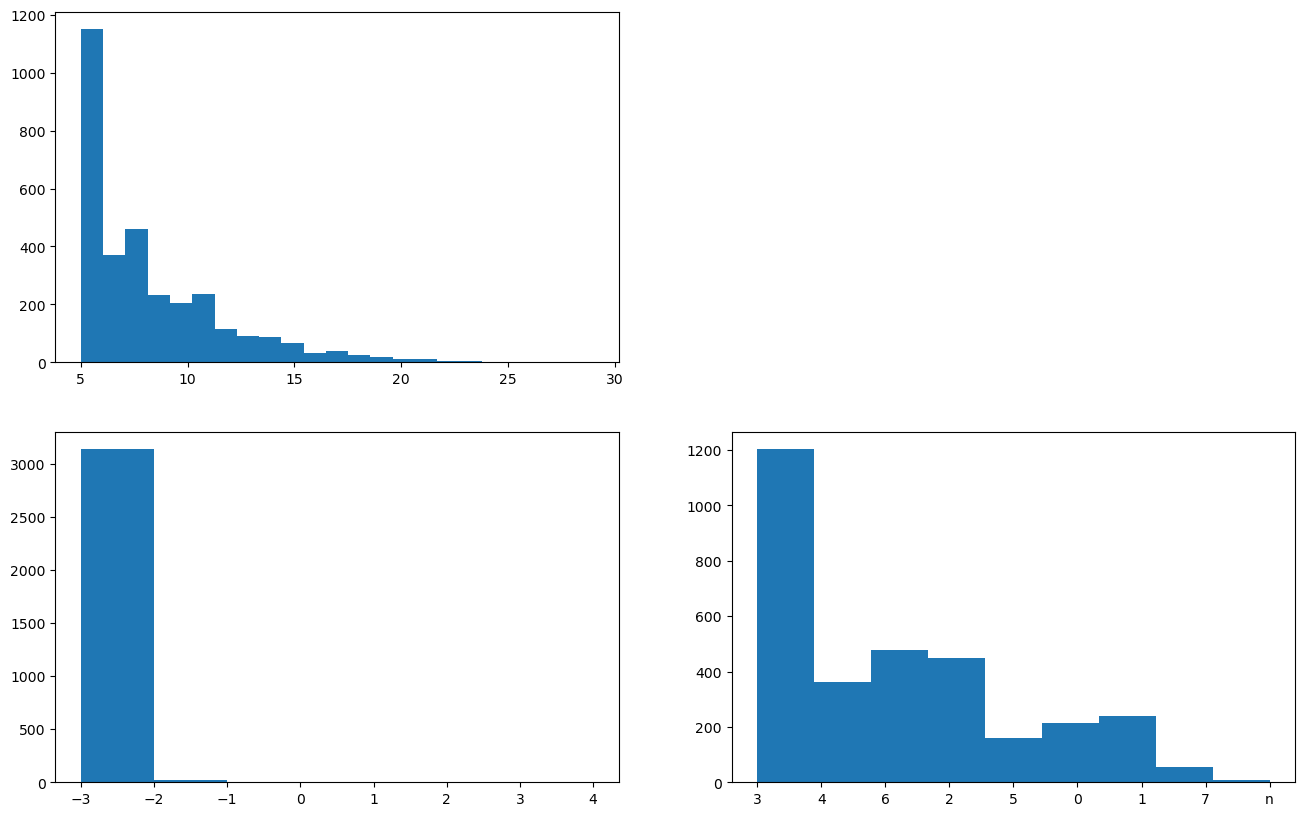

In [1410]:
fig = plt.figure()
fig.set_size_inches(16,10)

ax1 = fig.add_subplot(2,2,1)
plt.hist(df.Hashed_deal_detail_3, bins = df.Hashed_deal_detail_3.nunique())

ax1 = fig.add_subplot(2,2,3)
plt.hist(df.Hashed_deal_detail_5, bins = df.Hashed_deal_detail_5.nunique())
ax1 = fig.add_subplot(2,2,4)
plt.hist(df.Region, bins = df.Region.nunique())

plt.show()

### Видим, что есть квазиконстантные признаки. Избавимся от них при помощи VarianceThreshold 

In [1411]:
df

,Secret_info_1,Successful_deals_count,Region,Bank,Hashed_deal_detail_1,Hashed_deal_detail_2,Hashed_deal_detail_3,Hashed_deal_detail_4,Hashed_deal_detail_5,Age,...,Days_from_first_deal,Days_from_default,Deal_day,Deal_month,First_deal_day,First_deal_month,First_default_day,First_default_month,end_of_month,days_from_default
0,3.935514,0.0,3,7,2.5,-3,8,2.5,-3,36.0,...,68,553,5,11,29,8,1,5,0,553
1,3.500000,2.0,4,7,2.5,-3,14,3.5,-3,29.0,...,249,27,26,8,21,12,30,7,1,27
2,3.935514,0.0,6,7,2.5,-3,8,2.5,-3,56.0,...,99,658,18,2,11,11,1,5,0,658
3,3.935514,0.0,2,13,2.5,-2,5,2.5,-3,27.0,...,39,730,30,4,22,3,1,5,1,730
4,3.935514,0.0,4,39,2.5,-3,7,2.5,-3,37.0,...,60,872,19,9,21,7,1,5,0,872
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3163,3.935514,0.0,3,7,2.5,-3,10,2.5,-3,37.0,...,154,709,9,4,7,11,1,5,0,709
3164,3.935514,0.0,5,7,2.5,-3,10,2.5,-3,31.0,...,158,753,23,5,17,12,1,5,0,753
3165,3.935514,0.0,4,7,2.5,-3,5,3.5,-3,26.0,...,30,867,14,9,15,8,1,5,0,867
3166,3.935514,0.0,7,7,2.5,-3,11,2.5,-3,28.0,...,179,862,9,9,14,3,1,5,0,862


In [1412]:
from sklearn.feature_selection import VarianceThreshold

In [1413]:
var = VarianceThreshold(threshold=0.8)

In [1414]:
var.fit_transform(df.drop(['Region','Gender','Default'],axis=1))

array([[  0.,   7.,  -3., ...,   1.,   5., 553.],
       [  2.,   7.,  -3., ...,  30.,   7.,  27.],
       [  0.,   7.,  -3., ...,   1.,   5., 658.],
       ...,
       [  0.,   7.,  -3., ...,   1.,   5., 867.],
       [  0.,   7.,  -3., ...,   1.,   5., 862.],
       [  0.,  13.,  -3., ...,   1.,   5., 871.]])

In [1415]:
correct_columns = var.get_feature_names_out()

В список correct_columns нужно не забыть добавить 'Gender', 'Region', тк это категориальный признак 

In [1416]:
correct_columns = np.append(correct_columns,'Region')
correct_columns = np.append(correct_columns,'Gender')
correct_columns = np.append(correct_columns,'Default')


In [1417]:
df = df[correct_columns]

In [1418]:
df.describe()

,Successful_deals_count,Bank,Hashed_deal_detail_2,Hashed_deal_detail_3,Hashed_deal_detail_4,Age,Days_from_first_deal,Days_from_default,Deal_day,Deal_month,First_deal_day,First_deal_month,First_default_day,First_default_month,days_from_default,Default
count,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.00000,3168.000000,3168.000000,3168.000000
mean,1.039141,13.350694,-2.404356,8.462437,3.193813,36.411616,170.357008,606.840593,16.590909,6.583018,16.136048,6.651515,3.62279,5.125631,606.840593,0.110795
std,1.647222,8.851891,2.474564,3.521127,2.048743,10.821444,118.115282,253.343469,8.727351,3.056368,8.702071,3.430361,6.93035,1.483729,253.343469,0.313928
min,0.000000,2.000000,-3.000000,5.000000,2.500000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,0.000000
25%,0.000000,7.000000,-3.000000,6.000000,2.500000,28.000000,78.000000,539.000000,9.000000,4.000000,9.000000,4.000000,1.00000,5.000000,539.000000,0.000000
50%,0.000000,8.000000,-3.000000,8.000000,2.500000,34.000000,148.000000,689.000000,17.000000,7.000000,16.000000,6.000000,1.00000,5.000000,689.000000,0.000000
75%,2.000000,15.000000,-3.000000,10.000000,2.500000,43.000000,241.000000,795.000000,24.000000,9.000000,24.000000,10.000000,1.00000,5.000000,795.000000,0.000000
max,17.000000,58.000000,78.000000,29.000000,37.500000,72.000000,583.000000,883.000000,31.000000,12.000000,31.000000,12.000000,31.00000,12.000000,883.000000,1.000000


## Порисуем еще графиков. Исследуем некоторые признаки на выбросы

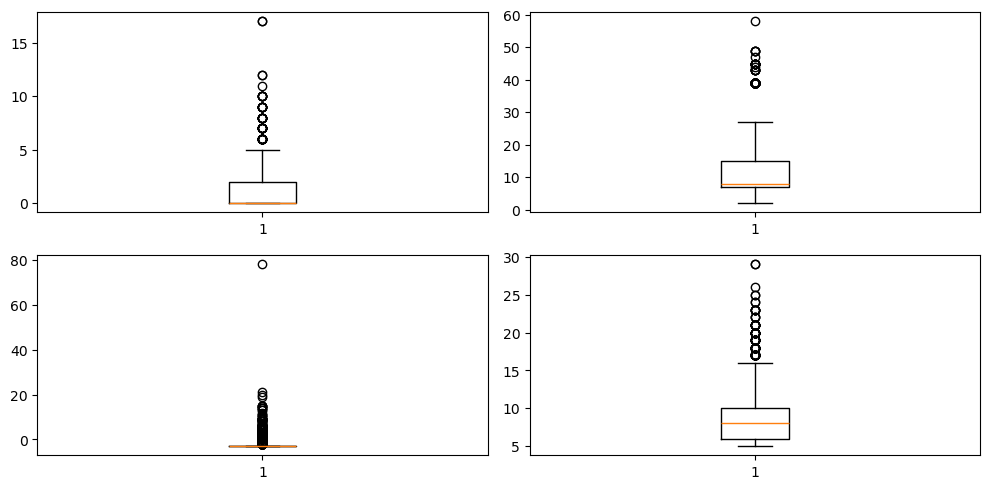

In [1419]:
fig = plt.figure()
fig.set_size_inches(10,5)

ax1 = fig.add_subplot(2,2,1)
plt.boxplot(df.Successful_deals_count.values)

ax2 = fig.add_subplot(2,2,2)
plt.boxplot(df.Bank.values)

ax3 = fig.add_subplot(2,2,3)
plt.boxplot(df.Hashed_deal_detail_2.values)

ax4 = fig.add_subplot(2,2,4)
plt.boxplot(df.Hashed_deal_detail_3.values)


plt.tight_layout()
plt.show()

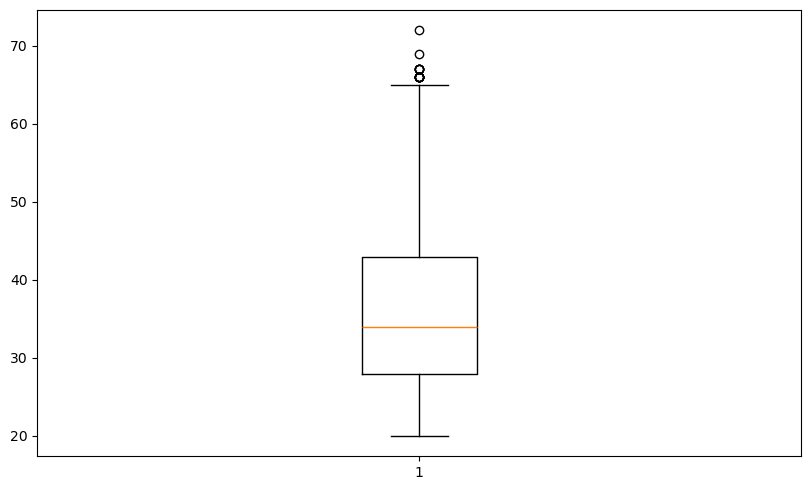

In [1420]:
fig = plt.figure()
fig.set_size_inches(16,5)

ax2 = fig.add_subplot(1,2,2)
plt.boxplot(df.Age.values)




plt.tight_layout()
plt.show()

Избавляемся от выбросов данных

In [1421]:
df = df[(df.Successful_deals_count<8)& (df.Bank<21) & (df.Hashed_deal_detail_2<3)&(df.Hashed_deal_detail_3<16)]

После избавления от выбросов, признак Hashed_deal_detail_2 стал квазикностантным

In [1431]:
df.Hashed_deal_detail_2.std()

0.768890437298311

In [1432]:
df=df.drop('Hashed_deal_detail_2',axis=1)

## Применяем OHE к колонке Gender, MTE к колонке Region

In [1433]:
ohe_cols_gender = pd.get_dummies(df.Gender, drop_first=True)
df = pd.concat((df,ohe_cols_gender),axis=1)
df = df.drop('Gender',axis=1)

In [1434]:
df.Male = df.Male.astype(int)

In [1435]:
region_te = df.groupby('Region')['Default'].mean()

In [1436]:

df.Region = df.Region.map(region_te)

In [1438]:
X = df.drop('Default',axis=1)
y = df.Default

##  Финал. Тренировка модели, подбор гиперпараметров 
### Оцениваю качество модели на валидационных и тестовых данных. Метрика - roc_auc

Для поиска наилучшей модели я взял функцию gridsearch_catboost_roc_auc. Благодаря данной функции сможем найти наилучшую модель, по сетке перебирая различные комбинации гиперпараметров

In [1439]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, ParameterGrid
from sklearn.metrics import roc_auc_score
from catboost import CatBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE, ADASYN
from imblearn.under_sampling import RandomUnderSampler


In [1440]:
def gridsearch_catboost_roc_auc(X, y, param_grid, val_size=0.2):
    X_tr, X_val, y_tr, y_val = train_test_split(X, y, test_size=val_size, stratify=y)
    
    results = []
    
    for params in ParameterGrid(param_grid):
        
        model = CatBoostClassifier(
            **params,
            verbose=0,
            learning_rate=0.01,
            loss_function='Logloss',
            auto_class_weights='Balanced'
          
        )
        
        model.fit(X_tr, y_tr)
        
        
        y_train_pred = model.predict_proba(X_tr)[:, 1]  
        y_val_pred = model.predict_proba(X_val)[:, 1]  
        
        roc_auc_train = roc_auc_score(y_tr, y_train_pred)
        roc_auc_val = roc_auc_score(y_val, y_val_pred)
        
        diff = roc_auc_train - roc_auc_val

        results.append({
            'params': params,
            'roc_auc_train': roc_auc_train,
            'roc_auc_val': roc_auc_val,
            'diff': diff
        })

        print(f"Params: {params} | ROC AUC Train: {roc_auc_train:.4f} | ROC AUC Val: {roc_auc_val:.4f} | Diff: {diff:.4f}")

    df_results = pd.DataFrame(results)
    return df_results

In [1441]:
param_grid_catboost = {
    'depth': [5,8,10],
    'l2_leaf_reg': [5.0,8.0,10.0],
    'iterations': [50, 100, 200]
}


In [1442]:

df_scores_catboost = gridsearch_catboost_roc_auc(X, y, param_grid_catboost)

Params: {'depth': 5, 'iterations': 50, 'l2_leaf_reg': 5.0} | ROC AUC Train: 0.7967 | ROC AUC Val: 0.7774 | Diff: 0.0193
Params: {'depth': 5, 'iterations': 50, 'l2_leaf_reg': 8.0} | ROC AUC Train: 0.7908 | ROC AUC Val: 0.7769 | Diff: 0.0139
Params: {'depth': 5, 'iterations': 50, 'l2_leaf_reg': 10.0} | ROC AUC Train: 0.7886 | ROC AUC Val: 0.7766 | Diff: 0.0120
Params: {'depth': 5, 'iterations': 100, 'l2_leaf_reg': 5.0} | ROC AUC Train: 0.8062 | ROC AUC Val: 0.7774 | Diff: 0.0288
Params: {'depth': 5, 'iterations': 100, 'l2_leaf_reg': 8.0} | ROC AUC Train: 0.8004 | ROC AUC Val: 0.7800 | Diff: 0.0203
Params: {'depth': 5, 'iterations': 100, 'l2_leaf_reg': 10.0} | ROC AUC Train: 0.7962 | ROC AUC Val: 0.7779 | Diff: 0.0183
Params: {'depth': 5, 'iterations': 200, 'l2_leaf_reg': 5.0} | ROC AUC Train: 0.8626 | ROC AUC Val: 0.7760 | Diff: 0.0866
Params: {'depth': 5, 'iterations': 200, 'l2_leaf_reg': 8.0} | ROC AUC Train: 0.8550 | ROC AUC Val: 0.7776 | Diff: 0.0774
Params: {'depth': 5, 'iterations'

Напишем такую же функцию для случайного леса

In [1443]:
def gridsearch_randomforest_roc_auc(X, y, param_grid, val_size=0.3, random_state=123):
    X_tr, X_val, y_tr, y_val = train_test_split(X, y, test_size=val_size, random_state=random_state, stratify=y)

    

    results = []
    
    for params in ParameterGrid(param_grid):
        model = RandomForestClassifier(
            **params,
            criterion = 'log_loss'
        )        
        model.fit(X_tr, y_tr)

        
        y_train_pred = model.predict_proba(X_tr)[:, 1]
        y_val_pred = model.predict_proba(X_val)[:, 1]


        roc_auc_train = roc_auc_score(y_tr, y_train_pred)
        roc_auc_val = roc_auc_score(y_val, y_val_pred)
        diff = roc_auc_train - roc_auc_val

        results.append({
            'params': params,
            'roc_auc_train': roc_auc_train,
            'roc_auc_val': roc_auc_val,
            'diff': diff
        })

        print(f"Params: {params} | ROC AUC Train: {roc_auc_train:.4f} | ROC AUC Val: {roc_auc_val:.4f} | Diff: {diff:.4f}")

    df_results = pd.DataFrame(results)
    return df_results

In [1444]:
param_grid_RandomForest = {
    'n_estimators': [50,100,150],
    'min_samples_leaf': [1,4,8],
    'max_depth': [None,70,100]
}

In [1445]:
df_scores_forest = gridsearch_randomforest_roc_auc(X, y, param_grid_RandomForest)

Params: {'max_depth': None, 'min_samples_leaf': 1, 'n_estimators': 50} | ROC AUC Train: 1.0000 | ROC AUC Val: 0.6402 | Diff: 0.3598
Params: {'max_depth': None, 'min_samples_leaf': 1, 'n_estimators': 100} | ROC AUC Train: 1.0000 | ROC AUC Val: 0.6701 | Diff: 0.3299
Params: {'max_depth': None, 'min_samples_leaf': 1, 'n_estimators': 150} | ROC AUC Train: 1.0000 | ROC AUC Val: 0.6734 | Diff: 0.3266
Params: {'max_depth': None, 'min_samples_leaf': 4, 'n_estimators': 50} | ROC AUC Train: 0.9927 | ROC AUC Val: 0.6890 | Diff: 0.3036
Params: {'max_depth': None, 'min_samples_leaf': 4, 'n_estimators': 100} | ROC AUC Train: 0.9959 | ROC AUC Val: 0.7038 | Diff: 0.2921
Params: {'max_depth': None, 'min_samples_leaf': 4, 'n_estimators': 150} | ROC AUC Train: 0.9969 | ROC AUC Val: 0.7013 | Diff: 0.2956
Params: {'max_depth': None, 'min_samples_leaf': 8, 'n_estimators': 50} | ROC AUC Train: 0.9634 | ROC AUC Val: 0.7307 | Diff: 0.2326
Params: {'max_depth': None, 'min_samples_leaf': 8, 'n_estimators': 100} 

Исходя из результатов вывода функций выберем оптимальные гиперпараметры для catboost, так как он показывает результат лучше, чем случайный лес

In [1446]:
model_catboost = CatBoostClassifier(loss_function='Logloss',depth = 5, iterations=100, l2_leaf_reg=8)

## Проверяем модель на тестовых данных

Заранее преобразовал тестовый датасет к формату тренировочных данных, чтобы не растягиват этот ноутбук

In [1562]:
test_df = pd.read_csv('transformed_test_data.csv',index=False)

In [1555]:
test_X = test_df.drop('Default',axis=1)
test_y = test_df['Default']

In [1556]:
model_catboost.fit(X,y,verbose=0)


In [1559]:
np.round(roc_auc_score(test_y, model_catboost.predict_proba(test_X)[:,1]),2)

0.67

## Заключение

В данном проекте получилось отработать навык отбора признаков, чистки датасета, подбора модели под задачу. С разных сторон взглянув на данные, я отобрал наиболее важные для модели признаки и добился качества 0.78 на валидационных данных и 0.67 на тестовых.